*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 6: Basics of R and ggplot2


This notebook contains exercises on getting started with data visualization using R and ggplot2. We're following [Chapter 3 in _R for Data Science_](https://r4ds.had.co.nz/data-visualisation.html) **(when I refer to "the book", I always mean this one!)**, except that we'll turn to datasets that we have seen before in the Python exercises. The book jumps right into data exploration by making visualizations: don't worry if you don't understand every basic language feature of R yet, we'll practice some of those later as we need them. Our focus is the same as the book's: getting started with producing some useful output quickly, and learning more as we go.

### Learning Goals

- Practice _first steps_ with R, Jupyter notebooks in R, and/or R Markdown notebooks.
- Understand _how to produce basic plots_ with R and ggplot2.

### Useful Resources

+ ["Data visualisation" in _R for Data Science_](https://r4ds.had.co.nz/data-visualisation.html)
+ [RStudio Cheatsheets](https://www.rstudio.com/resources/cheatsheets/)
+ [Hands-On Programming with R](https://rstudio-education.github.io/hopr/) _(as a reference)_

- - -
If you haven't yet installed the packages `palmerpenguins` (that provides the Penguins dataset we've also used in the Python exercises) and `tidyverse`, uncomment & run the following lines to install them:

In [1]:
#install.packages("palmerpenguins")
#install.packages("tidyverse")

In [2]:
library(palmerpenguins)
library(tidyverse)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



- - - 

## First Steps

If you installed and loaded the `palmerpenguins` library successfully, you should now have the Penguins dataset in a variable called `penguins`:

In [3]:
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007
Adelie,Torgersen,39.2,19.6,195,4675,male,2007
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007


**1. Look up help/documentation for the Penguins dataset by running `?penguins`.** You can prefix any command or variable with a question mark to look up help/documentation for it. Where it shows up depends on your environment: in Jupyter notebooks, it will appear below the cell; in R Studio, it will show up in the separate "Help" tab.

In [4]:
?penguins

penguins {palmerpenguins},R Documentation


**2. Familiarize yourself with R by running some basic commands on the dataset:** try at least `str()`, `head()`, `tail()`, `names()`. Do you understand their output? If not, remember you can look up documentation by prefixing the command name with a question mark, e.g. `?str`.

In [5]:
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


In [6]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [7]:
tail(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Chinstrap,Dream,45.7,17.0,195,3650,female,2009
Chinstrap,Dream,55.8,19.8,207,4000,male,2009
Chinstrap,Dream,43.5,18.1,202,3400,female,2009
Chinstrap,Dream,49.6,18.2,193,3775,male,2009
Chinstrap,Dream,50.8,19.0,210,4100,male,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


In [8]:
names(penguins)

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

**3. Drop rows containing missing values.** This is not mentioned in §3 of the book yet, but we're going to do it here already to get rid of some warnings we'll otherwise see when we work with the data. The function you need is simply called `drop_na()`; call this function on the penguins dataset **and assign the result to the `penguins` variable again**.

In [9]:
penguins <- drop_na(penguins)

**4. Make your first scatter plot!** Follow the code in §3.2.2 of the book, but use the `penguins` dataset instead, and pick any two numeric columns of the Penguins dataset for the $x$- and $y$-axis.

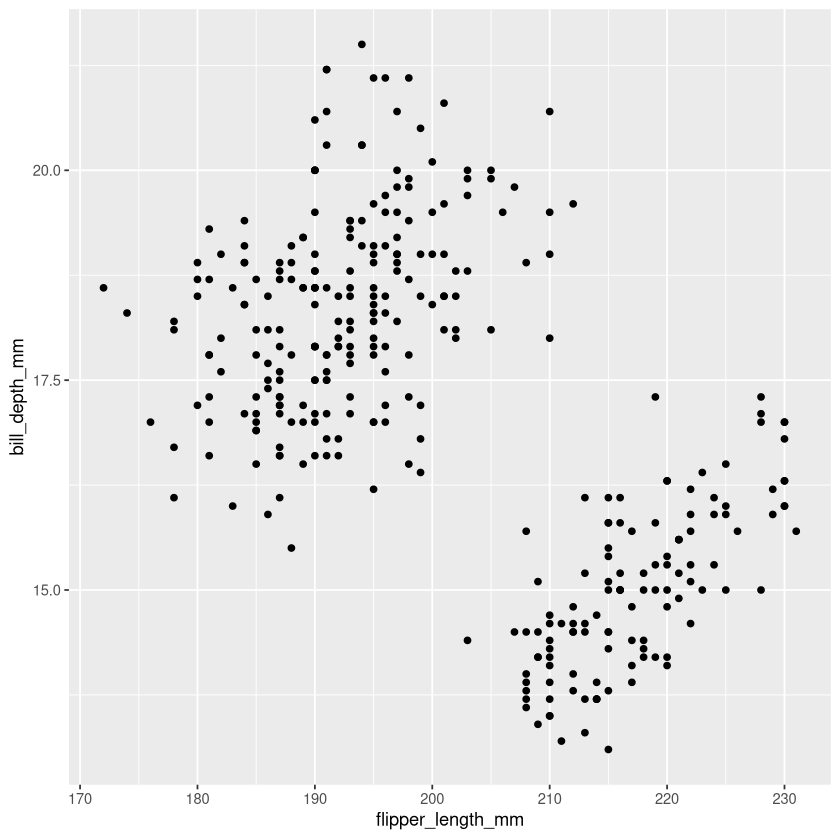

In [10]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm))

- - - 

## Aesthetic mappings and facets

A core feature of plotting with ggplot2 is the concept of "aesthetic mappings", created with the `aes()` function. For a scatter plot (or "point plot"), the most basic mapping is which variable should go on the $x$- and the $y$-axis. §3.3 in the book describes many more aesthetics that we can use with point plots – let's try them all out!

**5. Make at least one point plot for each of the different aesthetics!** Sometimes it's useful to test the difference between using a categorical variable (e.g. "species") or a continuous one (e.g. "body_mass_g"). Here are some suggestions:

 - `color` with a categorical variable
 - `color` with a continuous (numeric) variable
 - `shape` with a categorical variable
 - `size` with a continuous (numeric) variable
 - `alpha` with a continuous (numeric) variable

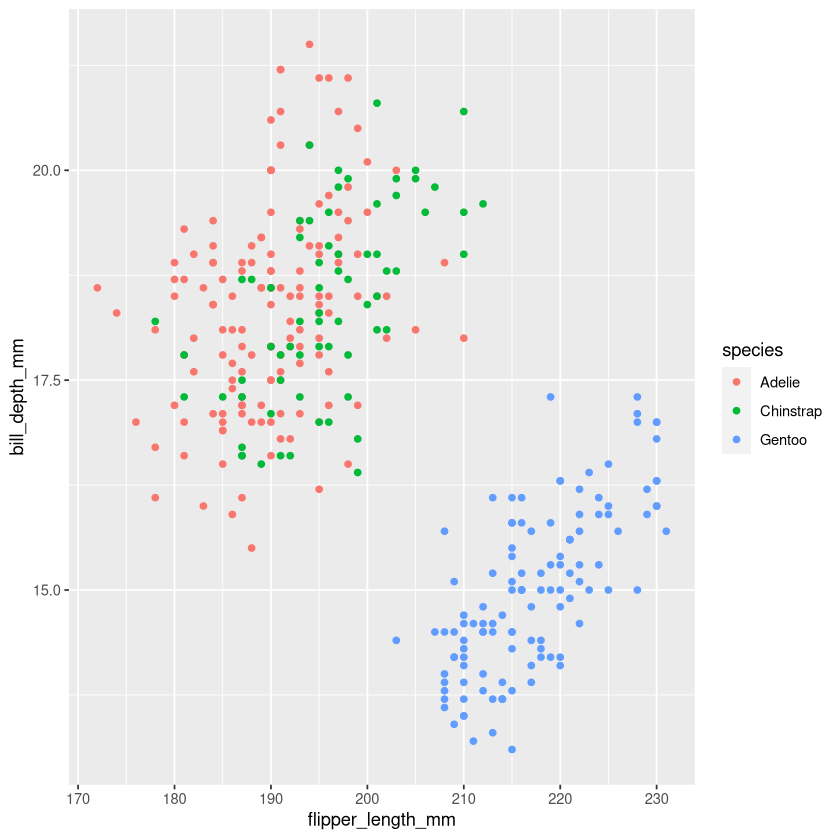

In [11]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm, color = species))

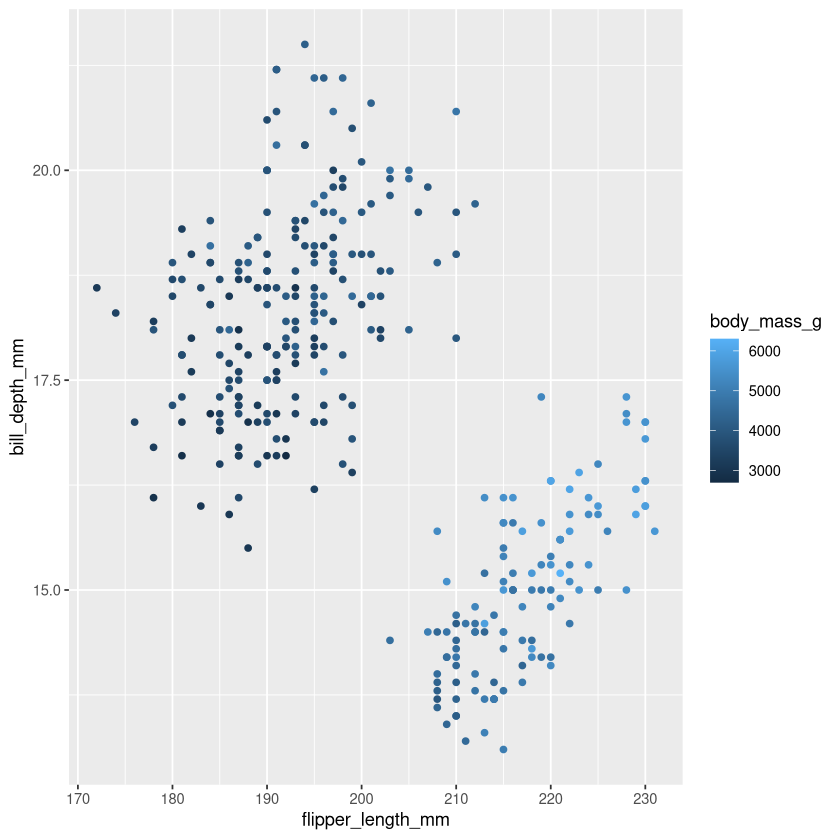

In [12]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm, color = body_mass_g))

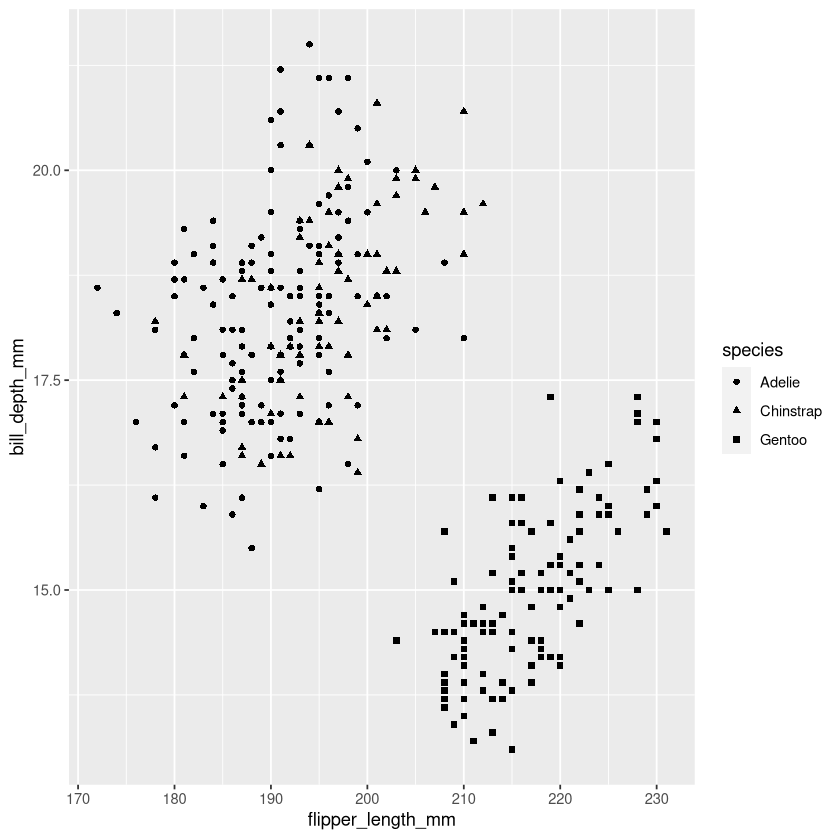

In [13]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm, shape = species))

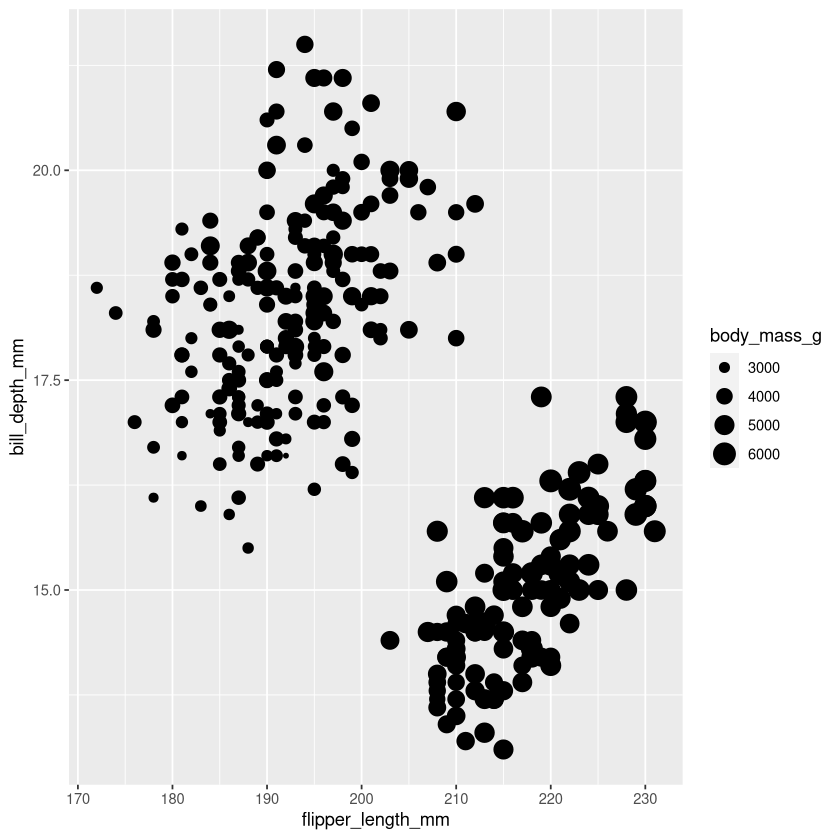

In [14]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm, size = body_mass_g))

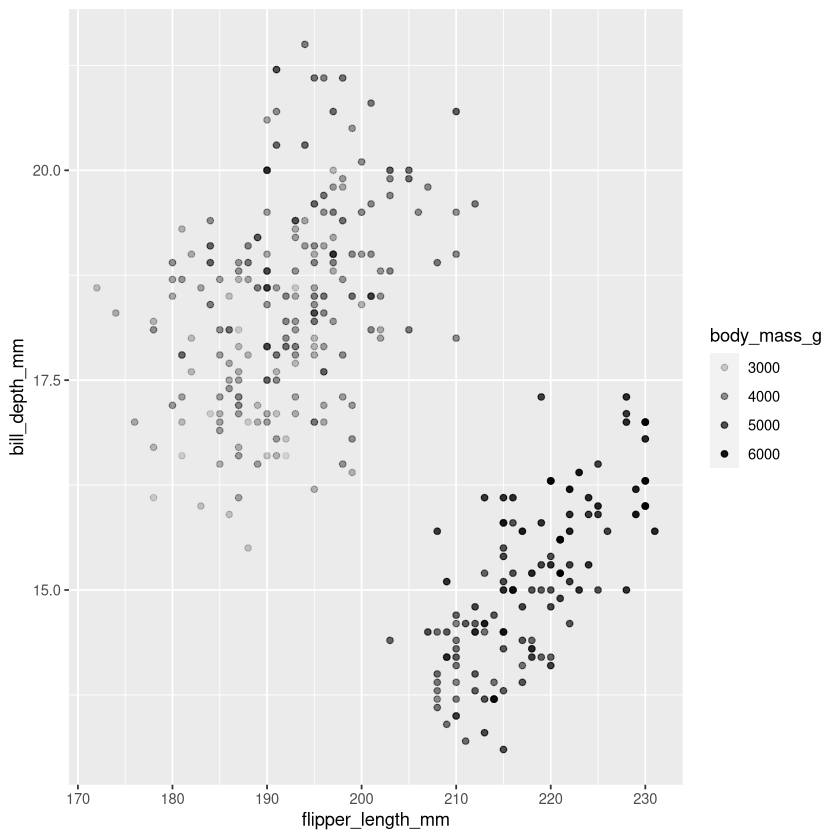

In [15]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm, alpha = body_mass_g))

**6. Make a point plot that visualizes _at least_ four different variables!** You can combine any number of the above-mentioned aesthetics in a single plot; however, not all combinations make sense, and not all of them result in a well-readable plot. Try to make one with at least four variables which is still readable & interpretable!

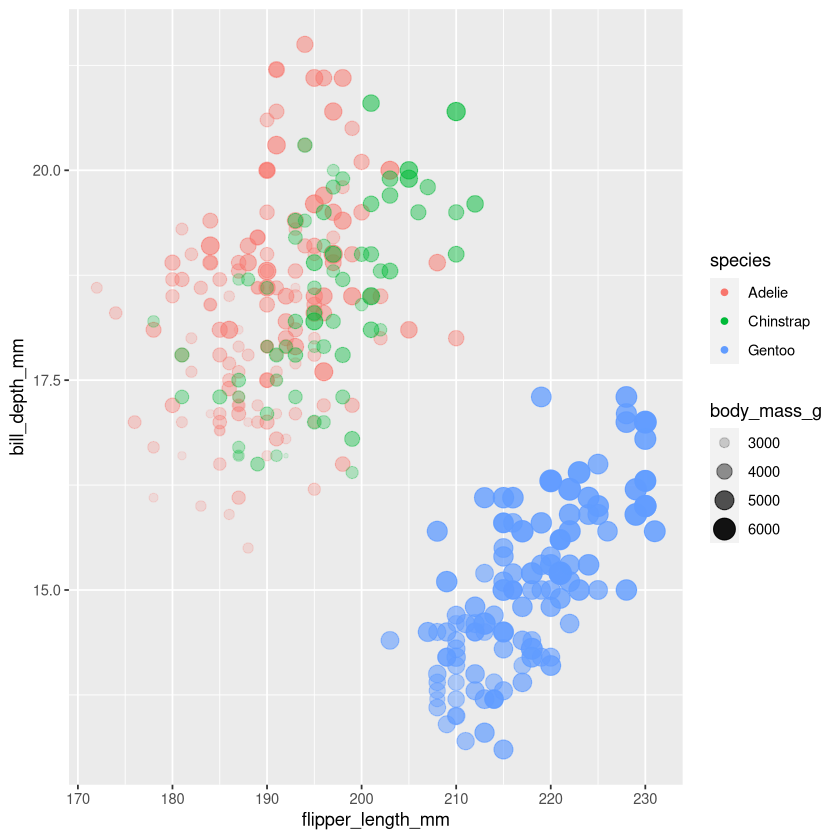

In [16]:
ggplot(penguins) +
  geom_point(aes(x=flipper_length_mm, y=bill_depth_mm, size=body_mass_g, alpha=body_mass_g, color=species))

**7. Make a point plot with three subplots, one for each "species" in the dataset.** Go through §3.5 in the book to learn how to do this. You can pick again any two continuous variables you like for the $x$- and $y$-axes.

_(Bonus: Add `theme(aspect.ratio = 1)` to make the subplots perfectly square.)_

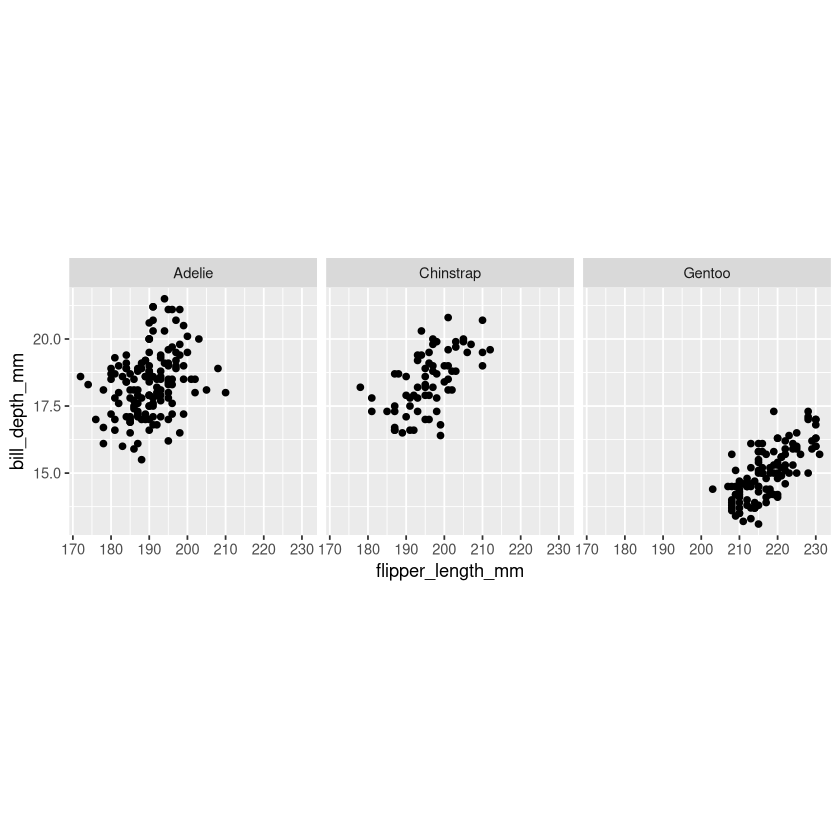

In [17]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm)) +
  facet_wrap(~ species) +
  theme(aspect.ratio = 1)

**8. Make a facet grid with one _row per "species"_ and one _column per "sex"_ of the penguins.** Again, pick whatever you like for the $x$- and $y$-axes.

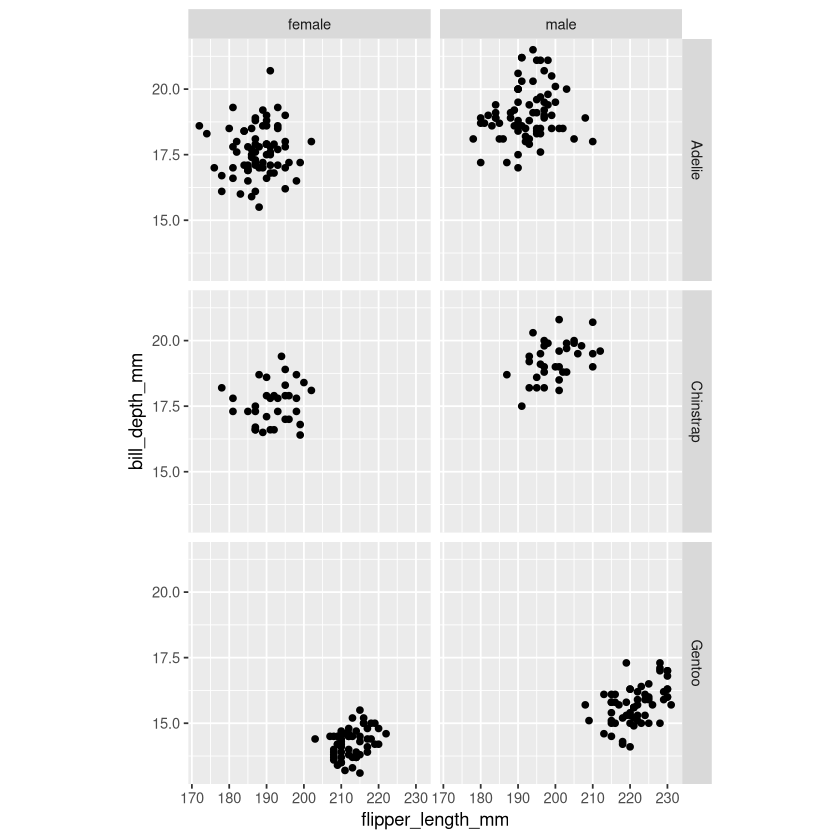

In [18]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = bill_depth_mm)) +
  facet_grid(species ~ sex) +
  theme(aspect.ratio = 1)

- - - 

## Geometric objects ("geoms")

So far, we only made scatter plots, with `geom_point()`. §3.6 in the book introduces a second "geom", called `geom_smooth()`, and also talks about plotting multiple geoms on a single plot. Let's try that out!

**9. Make a point plot with _flipper length_ on the $x$-axis and _body mass_ on the $y$-axis; then create the same plot, but replace `geom_point()` with `geom_smooth()`.** What do you see?

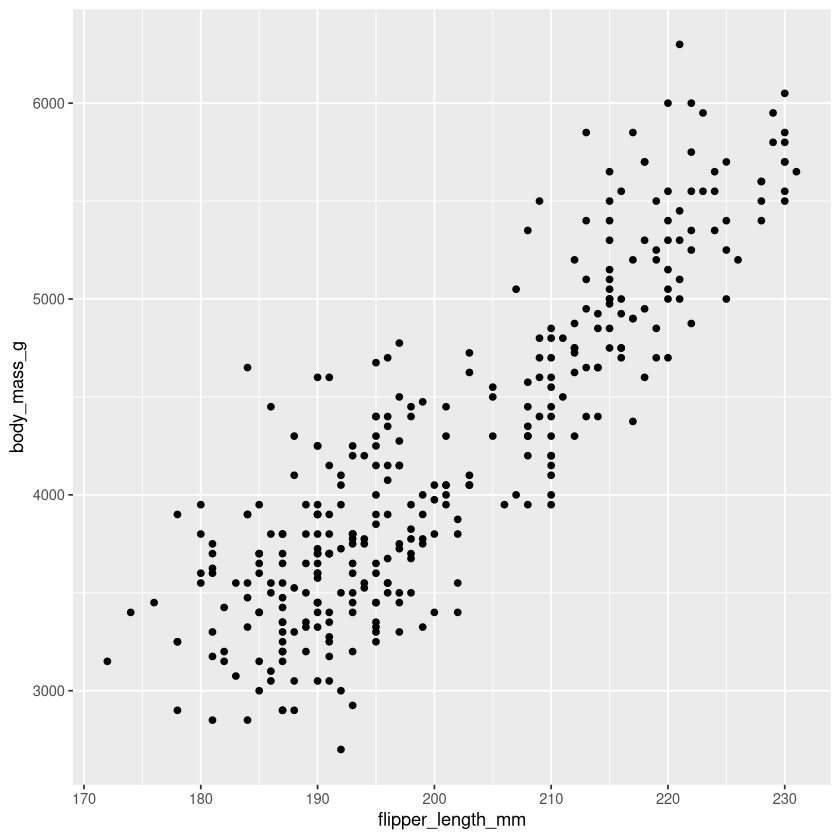

In [19]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = flipper_length_mm, y = body_mass_g))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



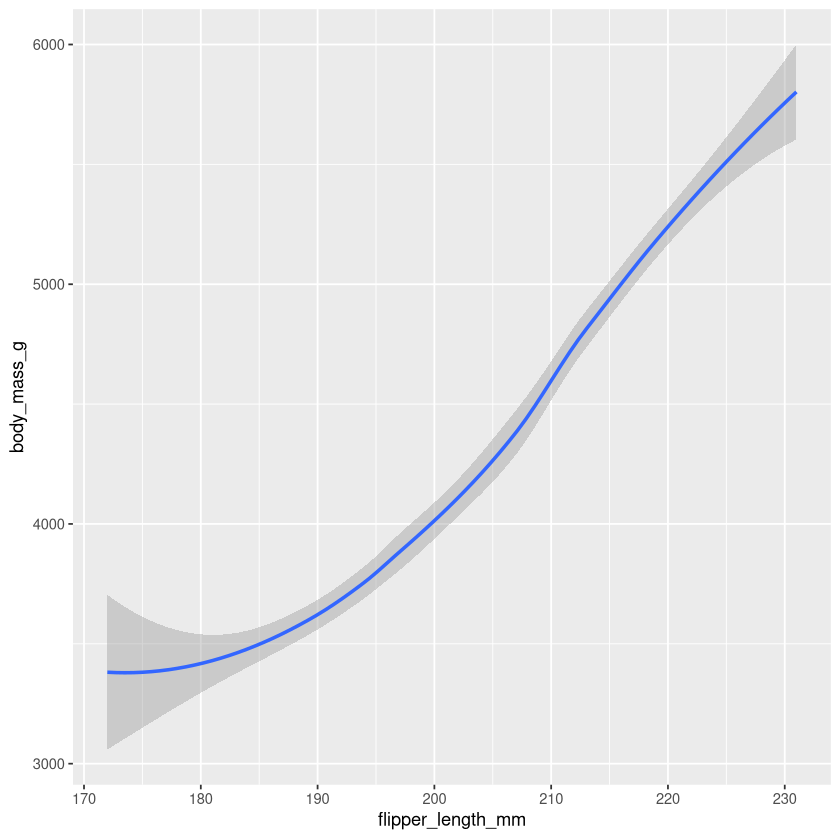

In [20]:
ggplot(data = penguins) +
  geom_smooth(mapping = aes(x = flipper_length_mm, y = body_mass_g))

**10. Make a plot that has both the points _and_ the smoothed estimator in a _single plot_!**  How can you do that without specifying the aesthetic mapping twice in your code?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



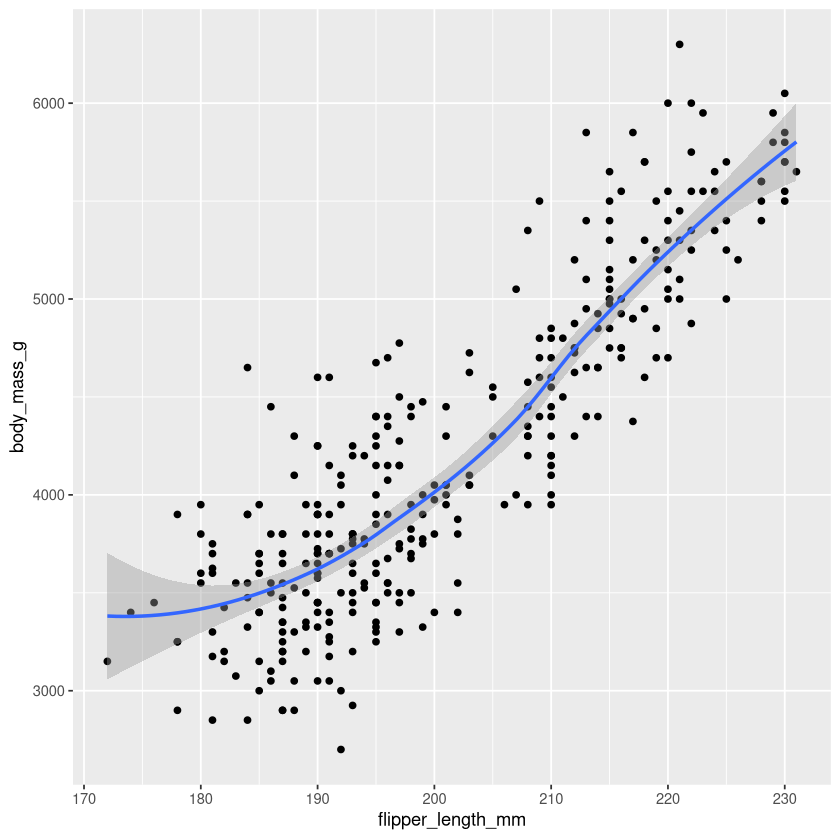

In [21]:
ggplot(data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point() +
  geom_smooth()

**11. Modify the previous plot by _turning off the confidence interval_ in the smoothed plot.** The book has an example how to do that, but you can also look at the help for the `geom_smooth()` function to find the solution.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



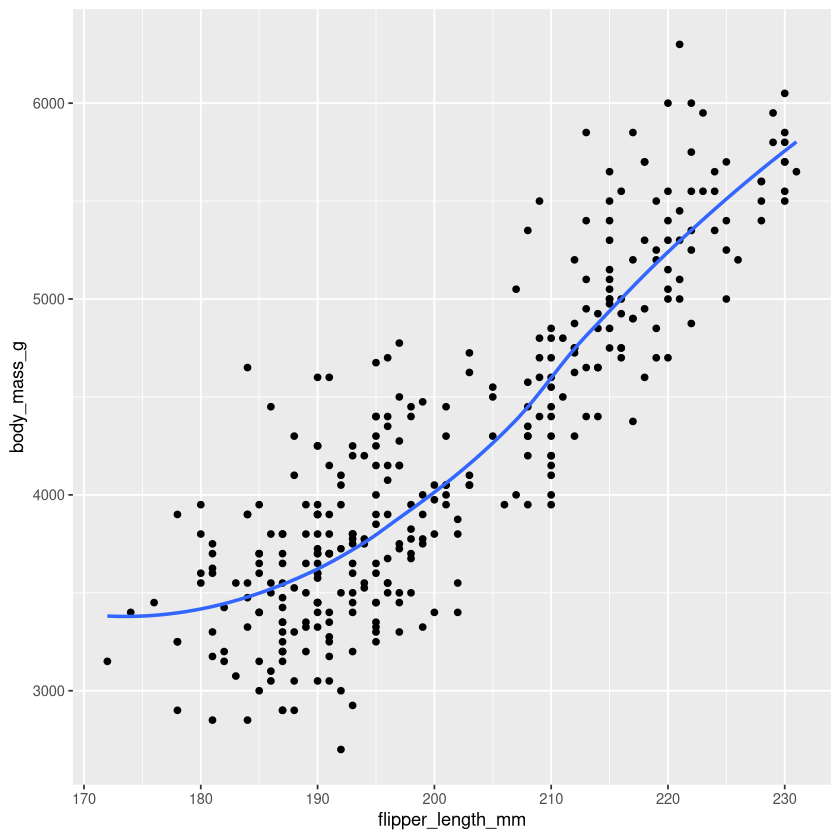

In [22]:
ggplot(data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point() +
  geom_smooth(se = FALSE)

**12. Make a combined point + smoothed estimator plot with the following properties:**

- _flipper length_ on the $x$-axis;
- _bill depth_ on the $y$-axis;
- separate colors and estimator lines for _species_;
- using "lm" (linear model, i.e. linear regression) as the _smoothing method_.

`geom_smooth()` using formula 'y ~ x'



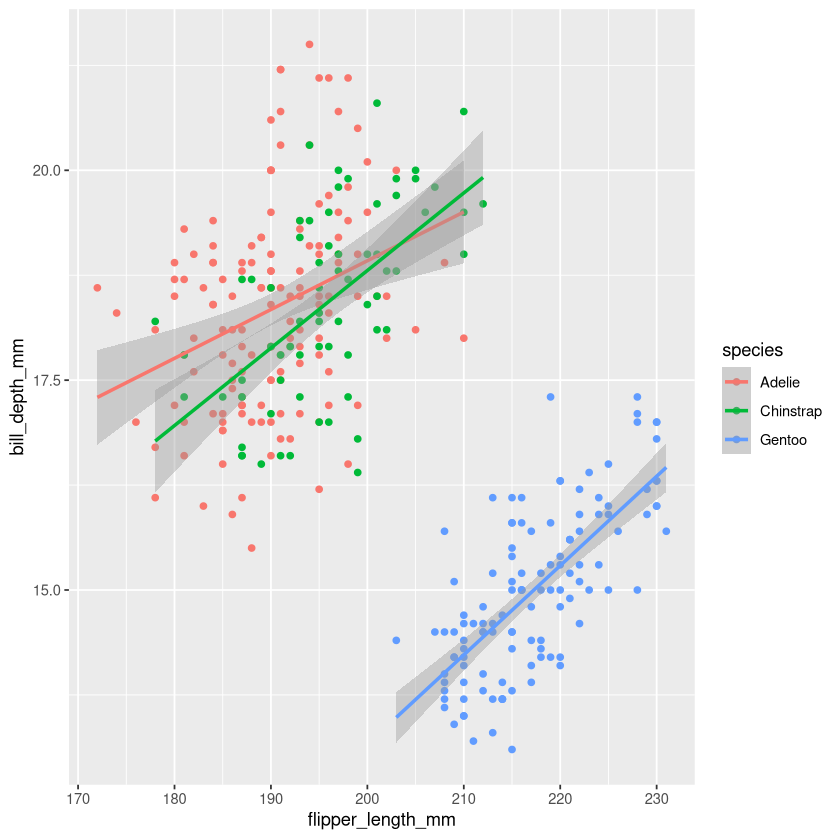

In [23]:
ggplot(data = penguins, mapping = aes(x = flipper_length_mm, y = bill_depth_mm, color = species)) +
  geom_point() +
  geom_smooth(method = lm)

- - - 

## Bar charts and more

§3.7 and §3.8 talk about bar charts, and the [RStudio Cheatsheet](https://www.rstudio.com/resources/cheatsheets/) for ggplot2 provides a convenient overview of many more geometric objects. Let's try out some of them, in particular those we've already seen in the Seaborn exercises.

**13. Make a bar chart that shows the number of penguins _per species_ in our dataset.** _Note:_ "Counting" the number of observations is the default behaviour of `geom_bar()`.

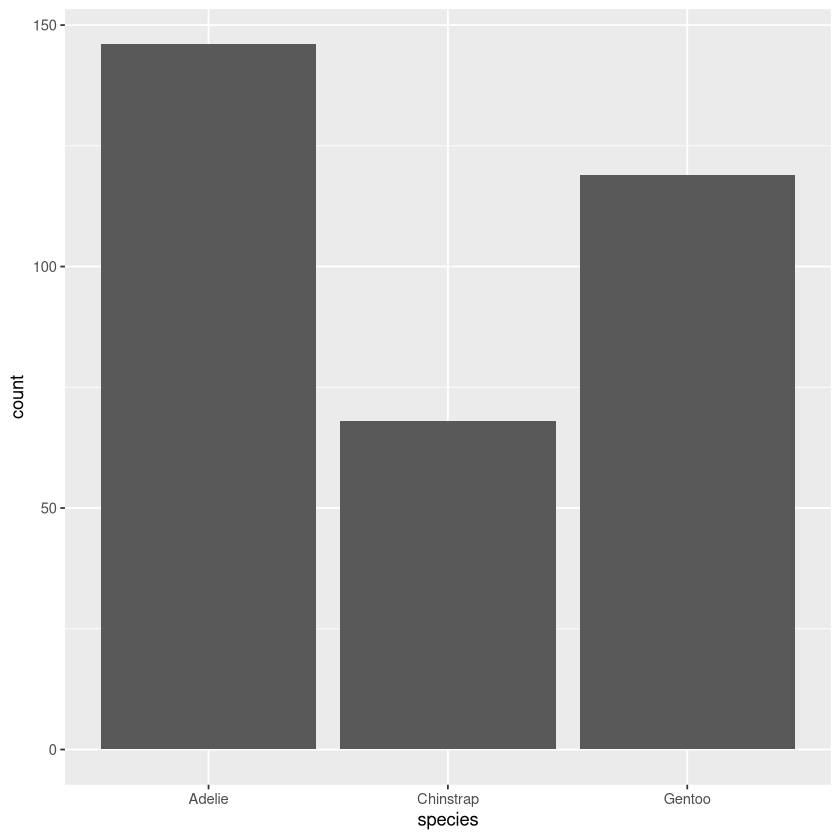

In [24]:
ggplot(data = penguins) +
  geom_bar(mapping = aes(x = species))

**14. Make two bar charts that show the number of penguins _per species_, and additionally visualise _sex_ of the penguins in different colors.** Try to do this in at least two ways:

- as a **stacked bar chart** (where the bars look the same as in Q12, but have differently colored/filled sections depending on the penguins' _sex_); and
- as a **dodged bar chart** (where the bar sections are next to each other instead of stacked).

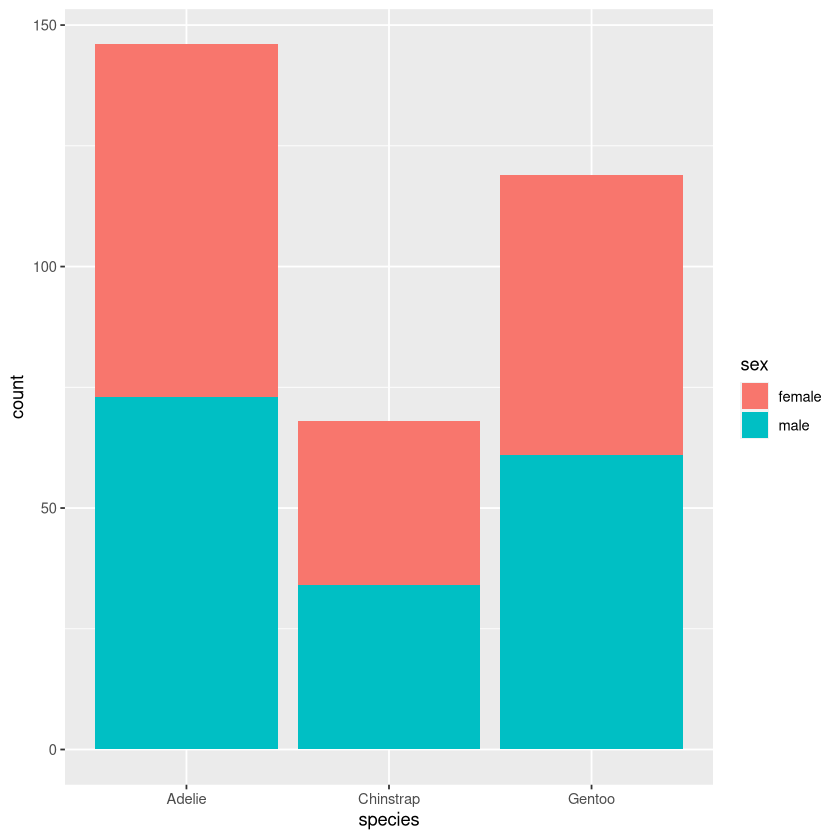

In [25]:
ggplot(data = penguins) +
  geom_bar(mapping = aes(x = species, fill = sex))

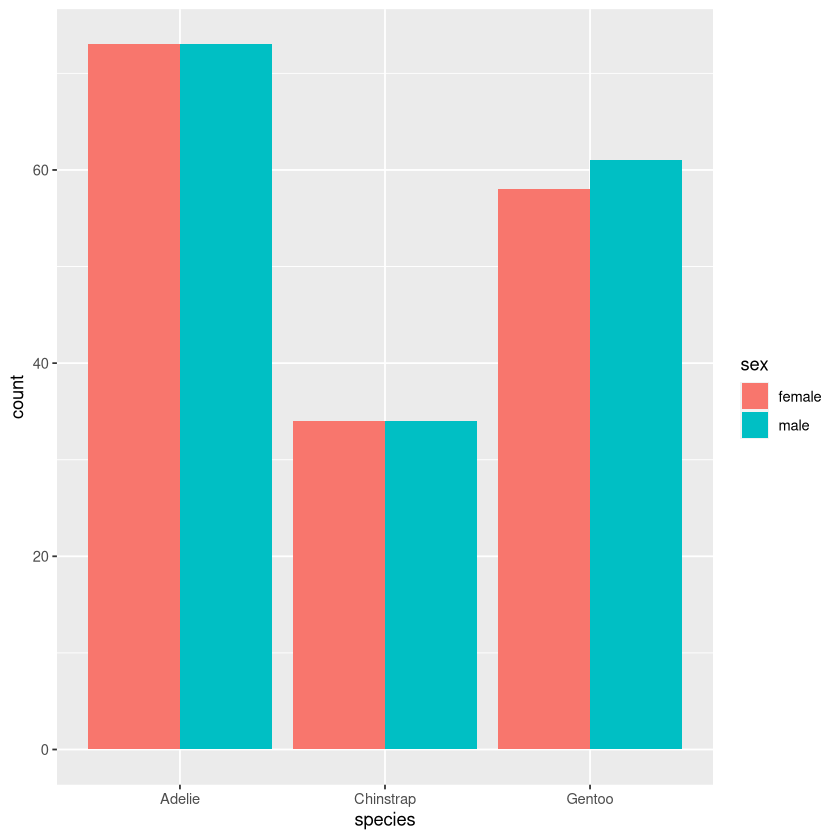

In [26]:
ggplot(data = penguins) +
  geom_bar(mapping = aes(x = species, fill = sex), position = "dodge")

**15. Make a _histogram_ of the _bill length_ variable!** The corresponding geom is called `geom_histogram()`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



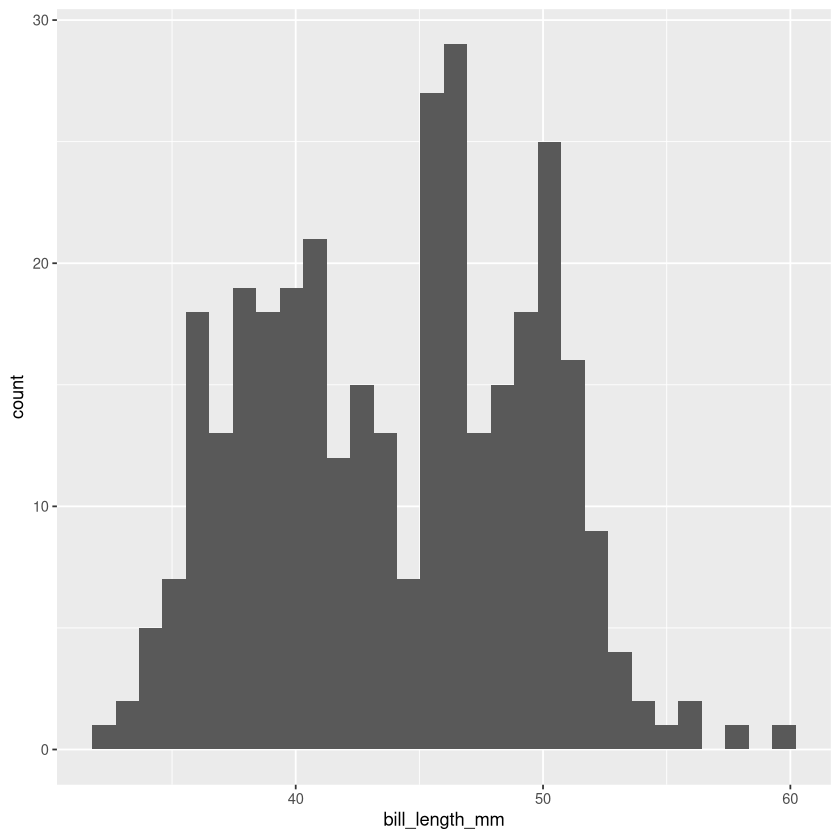

In [27]:
ggplot(data = penguins) +
  geom_histogram(mapping = aes(x = bill_length_mm))

**16. Make a _box plot_ using _species_ as the categorical variable, and _bill length_ as the continuous variable!** The corresponding geom is called `geom_boxplot()`.

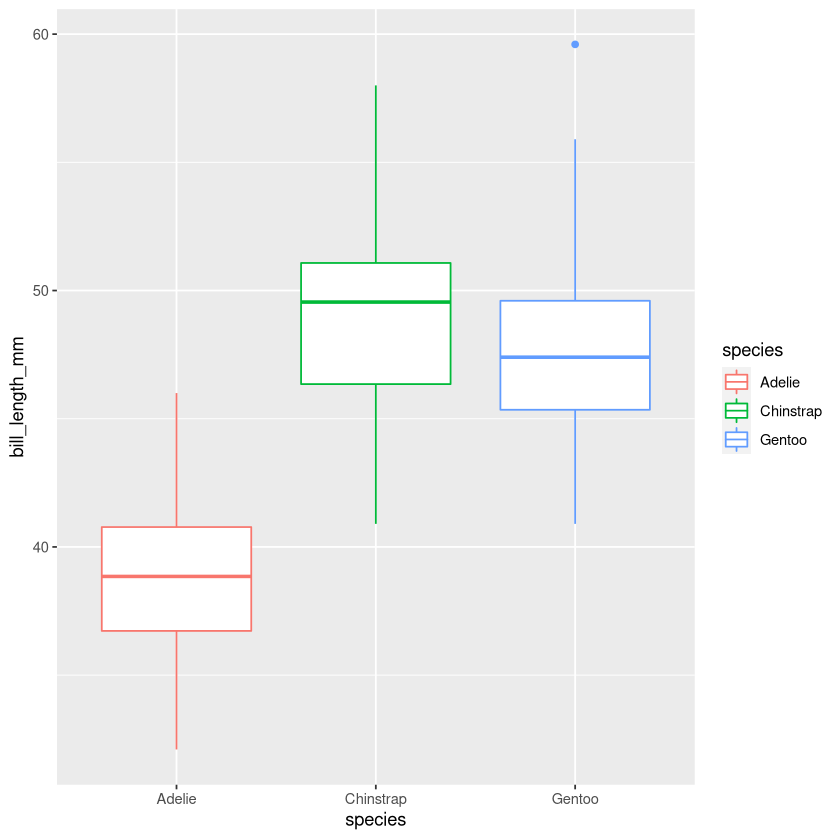

In [28]:
ggplot(data = penguins) +
  geom_boxplot(mapping = aes(x = species, y = bill_length_mm, color = species))

**17. Plot a kernel density estimation (KDE) of the _flipper length_ separately _per species_.** You can distinguish the _species_ by color, line type, or both. The corresponding geom is called `geom_density()`.

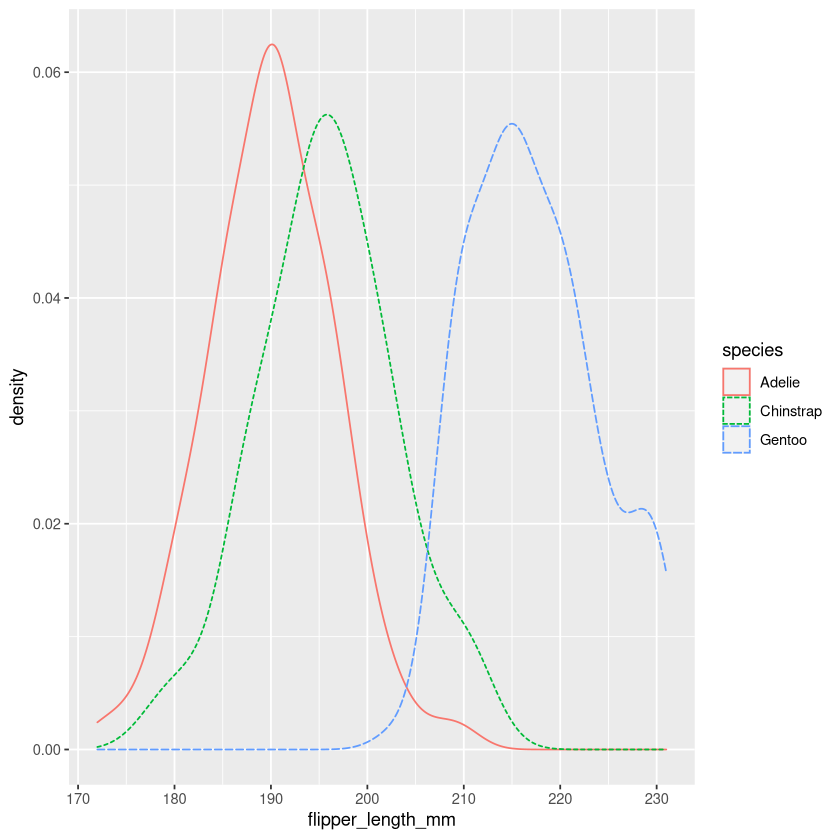

In [29]:
ggplot(data = drop_na(penguins)) +
  geom_density(mapping = aes(x = flipper_length_mm, color = species, linetype = species))